In [ ]:
!pip install statsmodels
import numpy as np  # For handling numerical data
import pandas as pd
import matplotlib.pyplot as plt  # For data visualization
from sklearn.linear_model import LinearRegression  # For building the regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For evaluating the model
import statsmodels.api as sm  # For OLS (Ordinary Least Squares) Regression
from sklearn.preprocessing import PolynomialFeatures

  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 3.4 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/9.9 MB 3.2 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.9 MB 3.2 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/9.9 MB 3.3 MB/s eta 0:00:03
   ------------ --------------------------- 3.1/9.9 MB 3.2 MB/s eta 0:00:03
   --------------- ------------------------ 3.9/9.9 MB 3.2 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.9 MB 3.1 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.9 MB 3.1 MB/s eta 0:00:02
   ---------------------- ----------------- 5.5/9.9 MB 3.2 MB/s eta 0:00:02
   ------------------------ --------------- 6.0/9.9 MB 3.0 MB/s eta 0:00:02
   -------------------------- ------------- 6.6/9.9 MB 3.0 MB/s eta 0:00:02
   --------------------------

In [ ]:
df = pd.read_csv('C:/Users/dasar/disaster-predict/DisasterPredict/backend/data_preprocessing/raw_data/datacsv.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10330 entries, 0 to 10329
Data columns (total 46 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   DisNo.                                     10330 non-null  object 
 1   Historic                                   10330 non-null  object 
 2   Classification Key                         10330 non-null  object 
 3   Disaster Group                             10330 non-null  object 
 4   Disaster Subgroup                          10330 non-null  object 
 5   Disaster Type                              10330 non-null  object 
 6   Disaster Subtype                           10330 non-null  object 
 7   External IDs                               2635 non-null   object 
 8   Event Name                                 2535 non-null   object 
 9   ISO                                        10330 non-null  object 
 10  Country               

In [ ]:
df.shape

(10330, 46)

In [ ]:
df.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')

In [ ]:
df.describe

<bound method NDFrame.describe of               DisNo. Historic Classification Key Disaster Group  \
0      1999-9388-DJI       No    nat-cli-dro-dro        Natural   
1      1999-9388-SDN       No    nat-cli-dro-dro        Natural   
2      1999-9388-SOM       No    nat-cli-dro-dro        Natural   
3      2000-0002-AGO       No    nat-hyd-flo-riv        Natural   
4      2000-0003-BGD       No    nat-met-ext-col        Natural   
...              ...      ...                ...            ...   
10325  2025-0142-GEO       No    nat-met-sto-bli        Natural   
10326  2025-0143-IND       No    nat-hyd-mmw-ava        Natural   
10327  2025-0150-IDN       No    nat-hyd-flo-flo        Natural   
10328  2025-0152-MDG       No    nat-met-sto-tro        Natural   
10329  2025-9122-SOM       No    nat-cli-dro-dro        Natural   

      Disaster Subgroup        Disaster Type       Disaster Subtype  \
0        Climatological              Drought                Drought   
1        Climatolog

In [ ]:
df.dtypes

DisNo.                                        object
Historic                                      object
Classification Key                            object
Disaster Group                                object
Disaster Subgroup                             object
Disaster Type                                 object
Disaster Subtype                              object
External IDs                                  object
Event Name                                    object
ISO                                           object
Country                                       object
Subregion                                     object
Region                                        object
Location                                      object
Origin                                        object
Associated Types                              object
OFDA/BHA Response                             object
Appeal                                        object
Declaration                                   

In [ ]:
df.head()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,DJI,...,NaN,NaN,NaN,NaN,NaN,NaN,58.111474,"[{""adm1_code"":1093,""adm1_name"":""Ali Sabieh""},{...",01-03-2006,25-09-2023
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SDN,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2757,""adm1_name"":""Northern Darfu...",08-03-2006,25-09-2023
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":2691,""adm1_name"":""Bay""},{""adm1_c...",08-03-2006,25-09-2023
3,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological,Flood,Riverine flood,NaN,NaN,AGO,...,NaN,NaN,NaN,NaN,10000.0,17695.0,56.514291,"[{""adm2_code"":4214,""adm2_name"":""Baia Farta""},{...",03-02-2005,25-09-2023
4,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological,Extreme temperature,Cold wave,NaN,NaN,BGD,...,NaN,NaN,NaN,NaN,NaN,NaN,56.514291,"[{""adm1_code"":575,""adm1_name"":""Barisal""},{""adm...",01-07-2003,25-09-2023


In [ ]:
df.tail()

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update
10325,2025-0142-GEO,No,nat-met-sto-bli,Natural,Meteorological,Storm,Blizzard/Winter storm,NaN,NaN,GEO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28-02-2025,05-03-2025
10326,2025-0143-IND,No,nat-hyd-mmw-ava,Natural,Hydrological,Mass movement (wet),Avalanche (wet),NaN,NaN,IND,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28-02-2025,04-03-2025
10327,2025-0150-IDN,No,nat-hyd-flo-flo,Natural,Hydrological,Flood,Flood (General),NaN,NaN,IDN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04-03-2025,06-03-2025
10328,2025-0152-MDG,No,nat-met-sto-tro,Natural,Meteorological,Storm,Tropical cyclone,GLIDE:TC-2025-000025,Tropical storm 'Honde',MDG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04-03-2025,05-03-2025
10329,2025-9122-SOM,No,nat-cli-dro-dro,Natural,Climatological,Drought,Drought,NaN,NaN,SOM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26-02-2025,05-03-2025


In [ ]:
duplicates= df[df.duplicated()]
duplicates

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,External IDs,Event Name,ISO,...,Reconstruction Costs ('000 US$),"Reconstruction Costs, Adjusted ('000 US$)",Insured Damage ('000 US$),"Insured Damage, Adjusted ('000 US$)",Total Damage ('000 US$),"Total Damage, Adjusted ('000 US$)",CPI,Admin Units,Entry Date,Last Update


In [ ]:

df.iloc[:5,:5]

,DisNo.,Historic,Classification Key,Disaster Group,Disaster Subgroup
0,1999-9388-DJI,No,nat-cli-dro-dro,Natural,Climatological
1,1999-9388-SDN,No,nat-cli-dro-dro,Natural,Climatological
2,1999-9388-SOM,No,nat-cli-dro-dro,Natural,Climatological
3,2000-0002-AGO,No,nat-hyd-flo-riv,Natural,Hydrological
4,2000-0003-BGD,No,nat-met-ext-col,Natural,Meteorological


In [ ]:
# Get unique values for each column
unique_values = {col: df[col].unique() for col in df.columns}

# Print unique values
for col, values in unique_values.items():
    print(f"Unique values in {col}: {values}")


Unique values in DisNo.: ['1999-9388-DJI' '1999-9388-SDN' '1999-9388-SOM' ... '2025-0150-IDN'
 '2025-0152-MDG' '2025-9122-SOM']
Unique values in Historic: ['No']
Unique values in Classification Key: ['nat-cli-dro-dro' 'nat-hyd-flo-riv' 'nat-met-ext-col' 'nat-geo-vol-ash'
 'nat-met-sto-sto' 'nat-cli-wil-lan' 'nat-met-sto-tor' 'nat-geo-ear-gro'
 'nat-met-sto-bli' 'nat-met-sto-tro' 'nat-hyd-flo-fla' 'nat-bio-epi-vir'
 'nat-bio-epi-dis' 'nat-bio-epi-bac' 'nat-hyd-flo-coa' 'nat-hyd-mmw-lan'
 'nat-hyd-flo-flo' 'nat-hyd-mmw-mud' 'nat-cli-wil-for' 'nat-hyd-mmw-ava'
 'nat-bio-epi-par' 'nat-bio-inf-loc' 'nat-met-sto-hai' 'nat-met-ext-hea'
 'nat-met-sto-sev' 'nat-hyd-mmw-sub' 'nat-geo-mmd-lan' 'nat-met-sto-lig'
 'nat-met-sto-san' 'nat-geo-ear-tsu' 'nat-met-sto-ext' 'nat-met-ext-sev'
 'nat-cli-wil-wil' 'nat-bio-inf-wor' 'nat-geo-mmd-roc' 'nat-hyd-mmw-roc'
 'nat-geo-mmd-ava' 'nat-ext-imp-col' 'nat-geo-vol-vol' 'nat-bio-ani-ani'
 'nat-geo-vol-lav' 'nat-met-sto-sur' 'nat-met-sto-der' 'nat-geo-vol-pyr

In [ ]:
# Using a for loop to get value counts for each column
for col in df.columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())  # Get value counts for the column
    print("-" * 30)  # Separator for better readability

Value counts for column: DisNo.
DisNo.
2025-9122-SOM    1
1999-9388-DJI    1
1999-9388-SDN    1
1999-9388-SOM    1
2000-0002-AGO    1
                ..
2000-0029-BGR    1
2000-0028-ROU    1
2000-0023-BGD    1
2000-0021-USA    1
2000-0020-IND    1
Name: count, Length: 10330, dtype: int64
------------------------------
Value counts for column: Historic
Historic
No    10330
Name: count, dtype: int64
------------------------------
Value counts for column: Classification Key
Classification Key
nat-hyd-flo-riv    2011
nat-met-sto-tro    1378
nat-hyd-flo-flo    1371
nat-hyd-flo-fla     708
nat-geo-ear-gro     645
nat-bio-epi-bac     429
nat-cli-dro-dro     419
nat-hyd-mmw-lan     379
nat-bio-epi-vir     351
nat-met-sto-sto     337
nat-met-ext-hea     243
nat-met-sto-sev     232
nat-met-ext-col     225
nat-cli-wil-for     196
nat-met-sto-bli     185
nat-met-sto-lig     172
nat-met-sto-tor     169
nat-met-sto-ext     144
nat-geo-vol-ash     104
nat-cli-wil-wil      82
nat-bio-epi-dis      81
n

In [ ]:
# no duplicate values found
# checking null values
df.isnull().sum()
# null values found, solution - remove null values

DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                  7695
Event Name                                    7795
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       421
Origin                                        6429
Associated Types                              6964
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0
AID Contribution ('000 US$)    

In [ ]:
# dropping columns with more than 80% null values
df = df.drop(columns=['River Basin', 'Reconstruction Costs (\'000 US$)', 'Insured Damage (\'000 US$)'])

In [ ]:
df.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'Start Year', 'Start Month',
       'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths',
       'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage, Adjusted ('000 US$)', 'Total Damage ('000 US$)',
       'Total Damage, Adjusted ('000 US$)', 'CPI', 'Admin Units', 'Entry Date',
       'Last Update'],
      dtype='object')

In [ ]:
df.shape

(10330, 43)

In [ ]:
df['Magnitude'].fillna(df['Magnitude'].median(), inplace=True)
df['Latitude'].fillna(df['Latitude'].mean(), inplace=True)
df['Longitude'].fillna(df['Longitude'].mean(), inplace=True)

C:\Users\dasar\AppData\Local\Temp\ipykernel_24092\3523442457.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Magnitude'].fillna(df['Magnitude'].median(), inplace=True)
C:\Users\dasar\AppData\Local\Temp\ipykernel_24092\3523442457.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [ ]:
df.isnull().sum()

DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                  7695
Event Name                                    7795
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                       421
Origin                                        6429
Associated Types                              6964
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0
AID Contribution ('000 US$)    

In [ ]:
df['Event Name'].fillna('Unknown', inplace=True)
df['Location'].fillna('Unknown', inplace=True)

C:\Users\dasar\AppData\Local\Temp\ipykernel_24092\1977284584.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Event Name'].fillna('Unknown', inplace=True)
C:\Users\dasar\AppData\Local\Temp\ipykernel_24092\1977284584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [ ]:
df.isnull().sum()

DisNo.                                           0
Historic                                         0
Classification Key                               0
Disaster Group                                   0
Disaster Subgroup                                0
Disaster Type                                    0
Disaster Subtype                                 0
External IDs                                  7695
Event Name                                       0
ISO                                              0
Country                                          0
Subregion                                        0
Region                                           0
Location                                         0
Origin                                        6429
Associated Types                              6964
OFDA/BHA Response                                0
Appeal                                           0
Declaration                                      0
AID Contribution ('000 US$)    

In [ ]:
df.columns

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'Start Year', 'Start Month',
       'Start Day', 'End Year', 'End Month', 'End Day', 'Total Deaths',
       'No. Injured', 'No. Affected', 'No. Homeless', 'Total Affected',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage, Adjusted ('000 US$)', 'Total Damage ('000 US$)',
       'Total Damage, Adjusted ('000 US$)', 'CPI', 'Admin Units', 'Entry Date',
       'Last Update'],
      dtype='object')

In [ ]:
columns_needed = [
    "Disaster Type", "Country", "OFDA/BHA Response", "Magnitude", "Magnitude Scale",
    "Latitude", "Longitude", "Start Year", "End Year",
    "Total Deaths", "No. Injured", "No. Affected", "No. Homeless", "Total Affected",
    "Total Damage, Adjusted ('000 US$)"
]

df = df[columns_needed]

In [ ]:
df.columns

Index(['Disaster Type', 'Country', 'OFDA/BHA Response', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'Start Year', 'End Year',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Total Damage, Adjusted ('000 US$)'],
      dtype='object')

In [ ]:
df.shape

(10330, 15)

In [ ]:
df.isnull().sum()

Disaster Type                           0
Country                                 0
OFDA/BHA Response                       0
Magnitude                               0
Magnitude Scale                      1089
Latitude                                0
Longitude                               0
Start Year                              0
End Year                                0
Total Deaths                         2956
No. Injured                          7407
No. Affected                         3511
No. Homeless                         9106
Total Affected                       1981
Total Damage, Adjusted ('000 US$)    7254
dtype: int64

In [ ]:
# handling missing categorical values
df["Magnitude Scale"].fillna("Unknown", inplace=True)

C:\Users\dasar\AppData\Local\Temp\ipykernel_24092\3538015333.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Magnitude Scale"].fillna("Unknown", inplace=True)


In [ ]:
# handling missing numerical values by filling with median
num_cols = [
    "Total Deaths", "No. Injured", "No. Affected", "No. Homeless",
    "Total Affected", "Total Damage, Adjusted ('000 US$)"
]

# Fill missing values with median
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\dasar\AppData\Local\Temp\ipykernel_24092\2914964859.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\dasar\AppData\Local\Temp\ipykernel_24092\2914964859.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [ ]:
# cleared all null values
df.isnull().sum()

Disaster Type                        0
Country                              0
OFDA/BHA Response                    0
Magnitude                            0
Magnitude Scale                      0
Latitude                             0
Longitude                            0
Start Year                           0
End Year                             0
Total Deaths                         0
No. Injured                          0
No. Affected                         0
No. Homeless                         0
Total Affected                       0
Total Damage, Adjusted ('000 US$)    0
dtype: int64

In [ ]:
df.duplicated().sum()

np.int64(25)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

Disaster Type                        0
Country                              0
OFDA/BHA Response                    0
Magnitude                            0
Magnitude Scale                      0
Latitude                             0
Longitude                            0
Start Year                           0
End Year                             0
Total Deaths                         0
No. Injured                          0
No. Affected                         0
No. Homeless                         0
Total Affected                       0
Total Damage, Adjusted ('000 US$)    0
dtype: int64

In [ ]:
import pandas as pd

# Save to a new CSV file
df.to_csv('C:/Users/dasar/disaster-predict/DisasterPredict/backend/data_preprocessing/processed_data/disaster_clean.csv', index=False)

print("File saved successfully!")


File saved successfully!


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for col in ['Disaster Type', 'Country', 'Magnitude Scale']:  # Add more if needed
    le = LabelEncoder()
    df.loc[:, col] = le.fit_transform(df[col])  # Using .loc to avoid warning
    label_encoders[col] = le  # Save encoders for later decoding


In [ ]:
non_numeric_cols = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)


Non-numeric columns: Index(['Disaster Type', 'Country', 'OFDA/BHA Response', 'Magnitude Scale'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['OFDA/BHA Response'] = le.fit_transform(df['OFDA/BHA Response'])


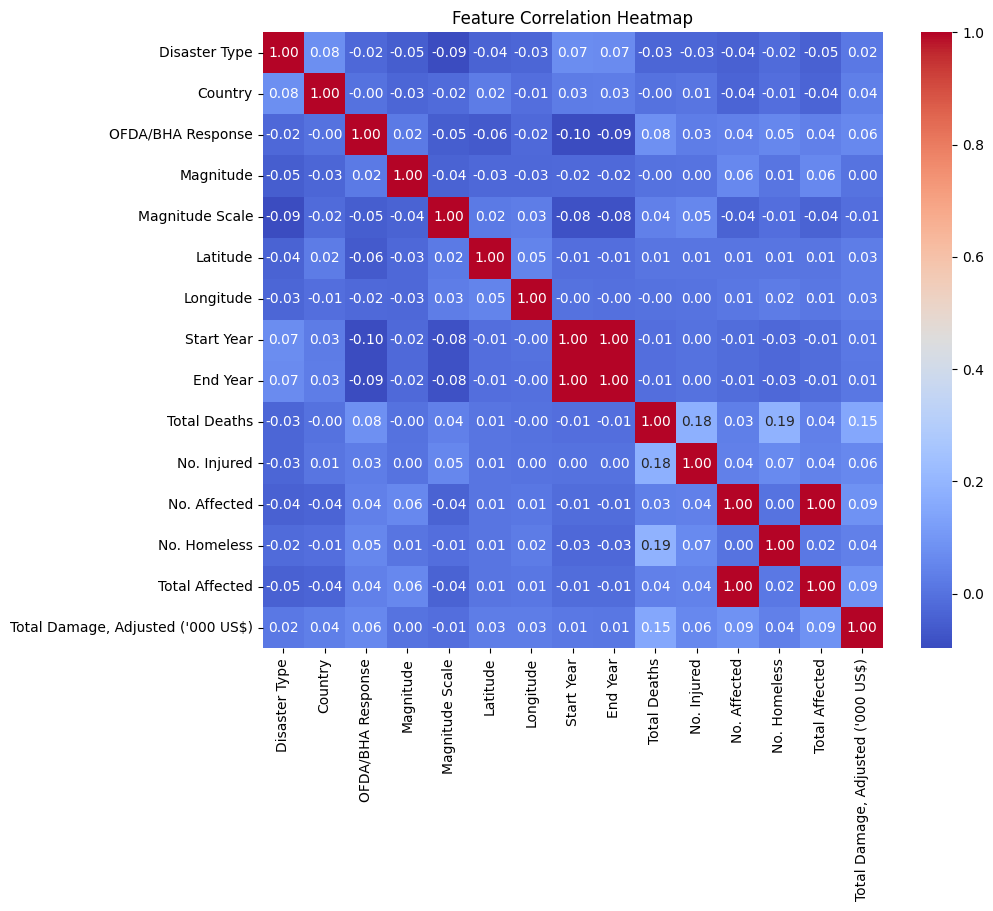

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# Droping redundant columns
df = df.drop(['No. Homeless', 'No. Affected'], axis=1)  # Keeping only 'Total Affected' instead

In [ ]:
df.columns

Index(['Disaster Type', 'Country', 'OFDA/BHA Response', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'Start Year', 'End Year',
       'Total Deaths', 'No. Injured', 'Total Affected',
       'Total Damage, Adjusted ('000 US$)'],
      dtype='object')

In [ ]:
df.isnull().sum()

Disaster Type                        0
Country                              0
OFDA/BHA Response                    0
Magnitude                            0
Magnitude Scale                      0
Latitude                             0
Longitude                            0
Start Year                           0
End Year                             0
Total Deaths                         0
No. Injured                          0
Total Affected                       0
Total Damage, Adjusted ('000 US$)    0
dtype: int64

In [ ]:
# Fill missing values
df = df.fillna(0) 

C:\Users\dasar\AppData\Local\Temp\ipykernel_24092\3053043797.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(0)


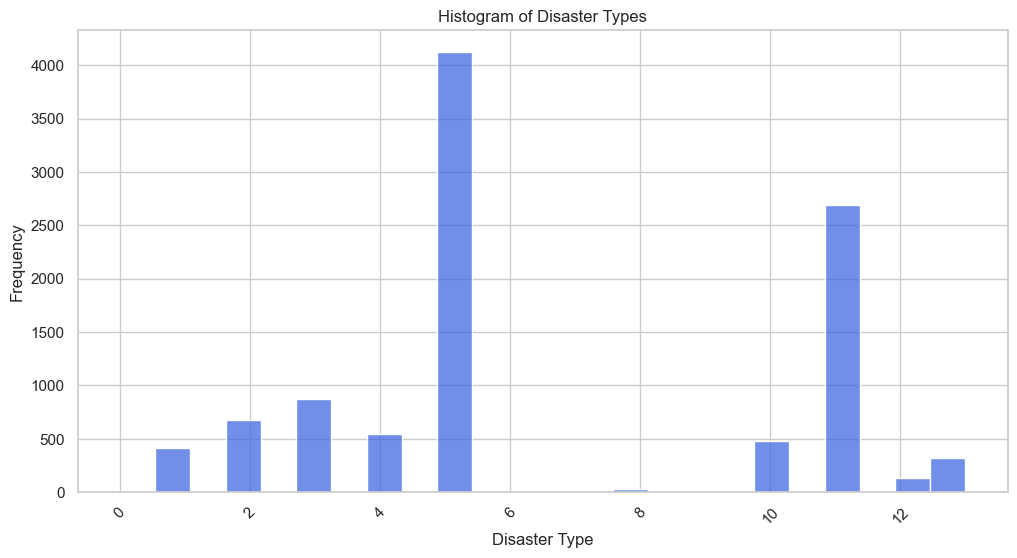

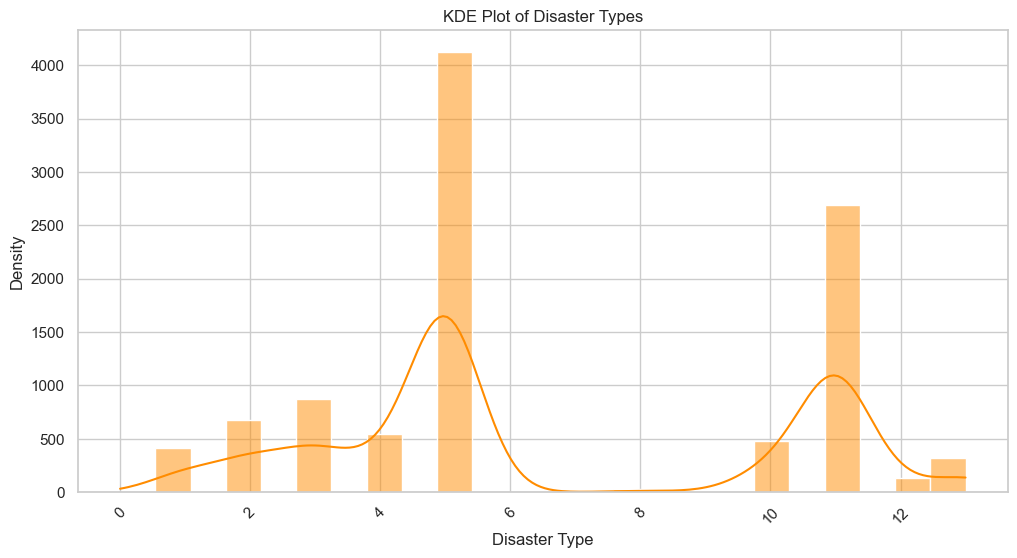

C:\Users\dasar\AppData\Local\Temp\ipykernel_24092\3876037882.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disaster Type', y='Total Deaths', data=df, palette="coolwarm")


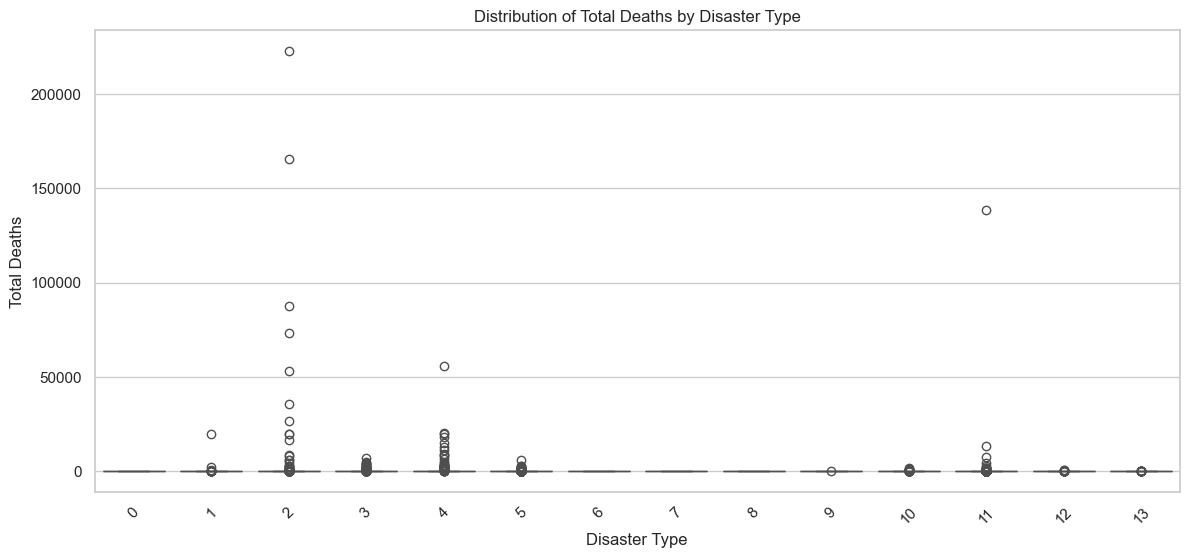

C:\Users\dasar\AppData\Local\Temp\ipykernel_24092\3876037882.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Disaster Type', y='Magnitude', data=df, palette="viridis")


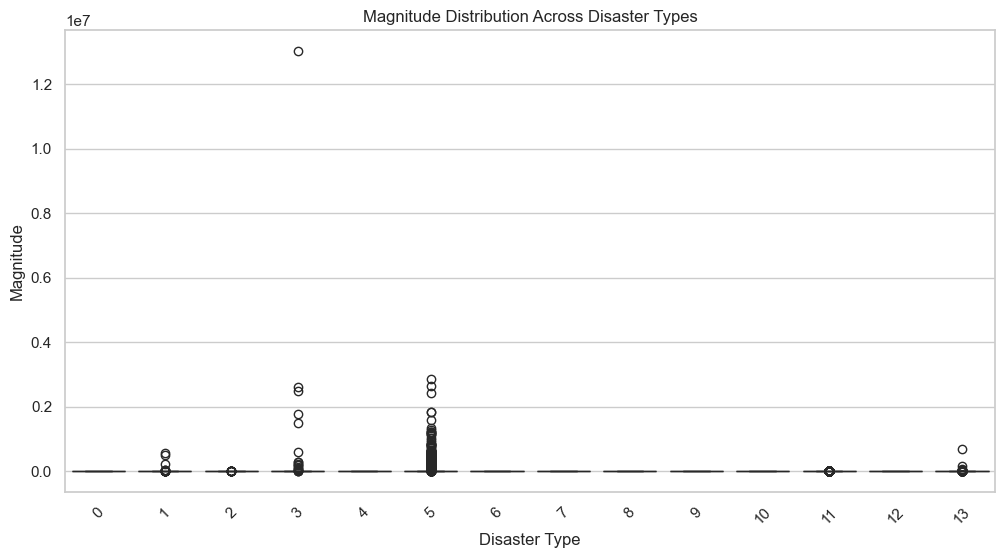

C:\Users\dasar\AppData\Local\Temp\ipykernel_24092\3876037882.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Disaster Type', y=df["Total Damage, Adjusted ('000 US$)"], data=df, palette="magma")


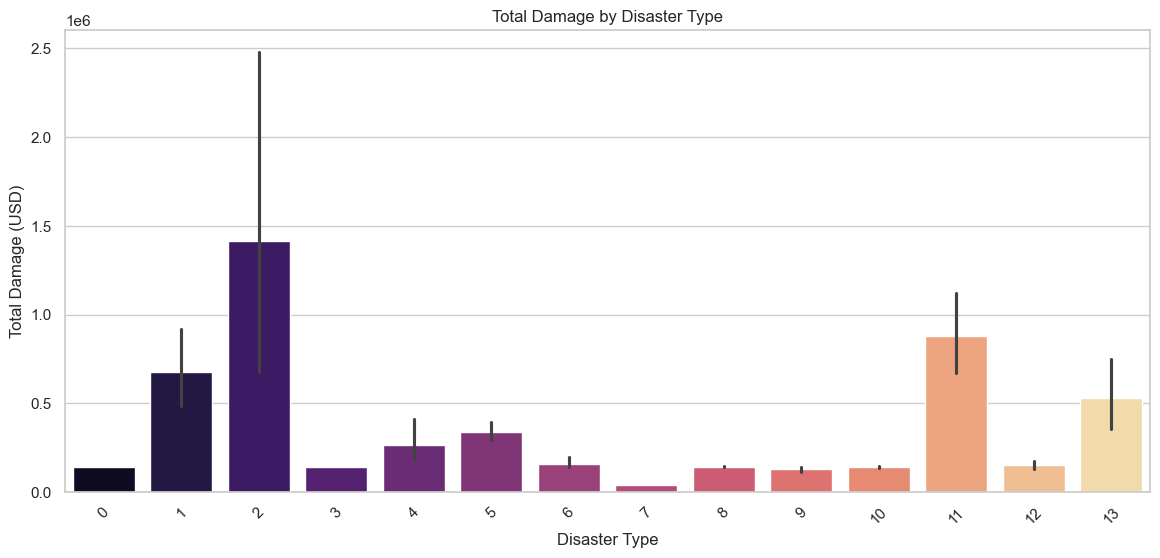

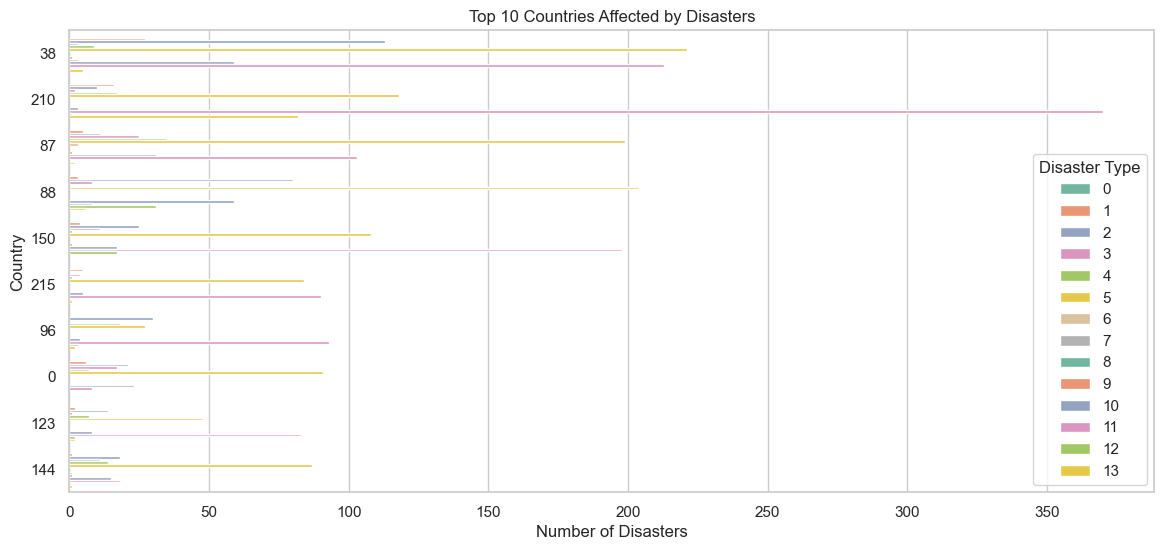

In [ ]:
# Set Seaborn style
sns.set(style="whitegrid")

### 🔹 HISTOGRAM: Frequency Distribution of Disaster Types ###
plt.figure(figsize=(12, 6))
sns.histplot(df['Disaster Type'], kde=False, color="royalblue")
plt.xticks(rotation=45)
plt.title("Histogram of Disaster Types")
plt.xlabel("Disaster Type")
plt.ylabel("Frequency")
plt.show()

### 🔹 KDE PLOT: Density of Disaster Types ###
plt.figure(figsize=(12, 6))
sns.histplot(df['Disaster Type'], kde=True, color="darkorange")
plt.xticks(rotation=45)
plt.title("KDE Plot of Disaster Types")
plt.xlabel("Disaster Type")
plt.ylabel("Density")
plt.show()

### 🔹 UNIVARIATE ANALYSIS: Boxplot for Disaster Types ###
plt.figure(figsize=(14, 6))
sns.boxplot(x='Disaster Type', y='Total Deaths', data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribution of Total Deaths by Disaster Type")
plt.xlabel("Disaster Type")
plt.ylabel("Total Deaths")
plt.show()

### 🔹 BIVARIATE ANALYSIS: Magnitude vs. Disaster Types ###
plt.figure(figsize=(12, 6))
sns.boxplot(x='Disaster Type', y='Magnitude', data=df, palette="viridis")
plt.xticks(rotation=45)
plt.title("Magnitude Distribution Across Disaster Types")
plt.xlabel("Disaster Type")
plt.ylabel("Magnitude")
plt.show()

### 🔹 BIVARIATE ANALYSIS: Damage Cost vs. Disaster Types ###
plt.figure(figsize=(14, 6))
sns.barplot(x='Disaster Type', y=df["Total Damage, Adjusted ('000 US$)"], data=df, palette="magma")
plt.xticks(rotation=45)
plt.title("Total Damage by Disaster Type")
plt.xlabel("Disaster Type")
plt.ylabel("Total Damage (USD)")
plt.show()

### 🔹 BIVARIATE ANALYSIS: Count of Disasters by Country ###
plt.figure(figsize=(14, 6))
sns.countplot(y='Country', hue='Disaster Type', data=df, palette="Set2", order=df['Country'].value_counts().index[:10])
plt.title("Top 10 Countries Affected by Disasters")
plt.xlabel("Number of Disasters")
plt.ylabel("Country")
plt.legend(title="Disaster Type")
plt.show()

In [ ]:
# Count the number of occurrences for each disaster type
disaster_counts = df['Disaster Type'].value_counts()
print(disaster_counts)


Disaster Type
5     4121
11    2687
3      878
2      675
4      543
10     478
1      419
13     324
12     130
8       29
9       14
6        5
7        1
0        1
Name: count, dtype: int64


C:\Users\dasar\AppData\Local\Temp\ipykernel_24092\3490549293.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette="viridis")


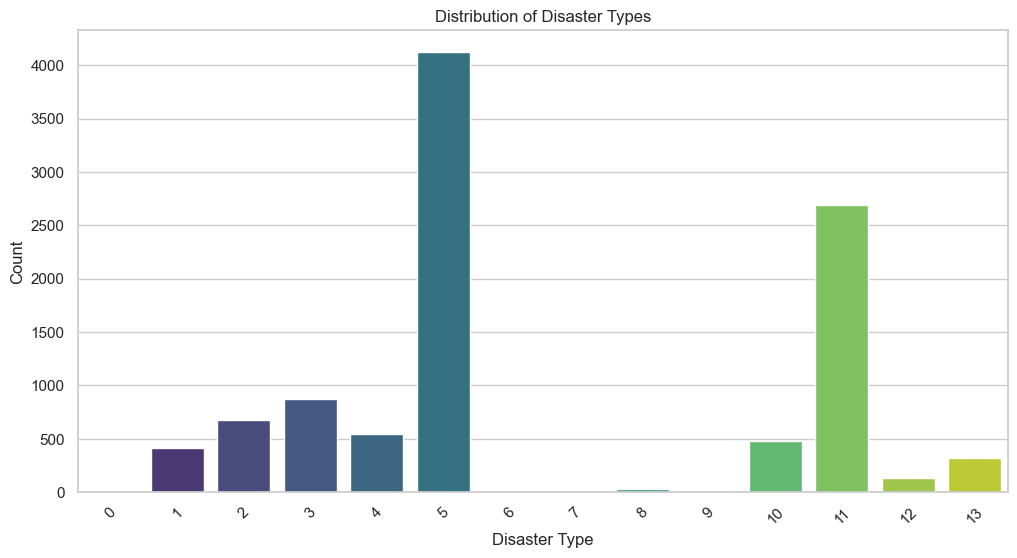

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=disaster_counts.index, y=disaster_counts.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel("Disaster Type")
plt.ylabel("Count")
plt.title("Distribution of Disaster Types")
plt.show()

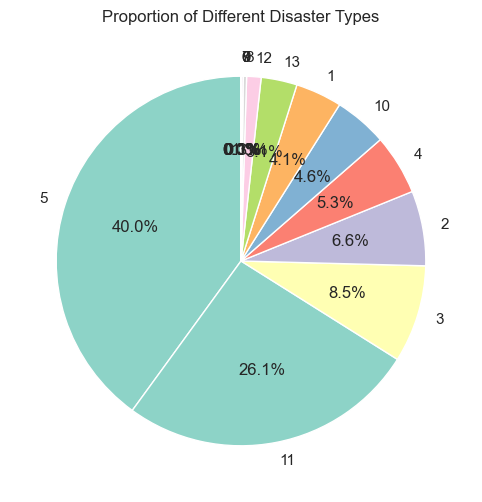

In [ ]:
plt.figure(figsize=(10, 6))
df['Disaster Type'].value_counts().plot.pie(autopct='%1.1f%%', cmap="Set3", startangle=90)
plt.title("Proportion of Different Disaster Types")
plt.ylabel("")  # Hide y-axis label
plt.show()

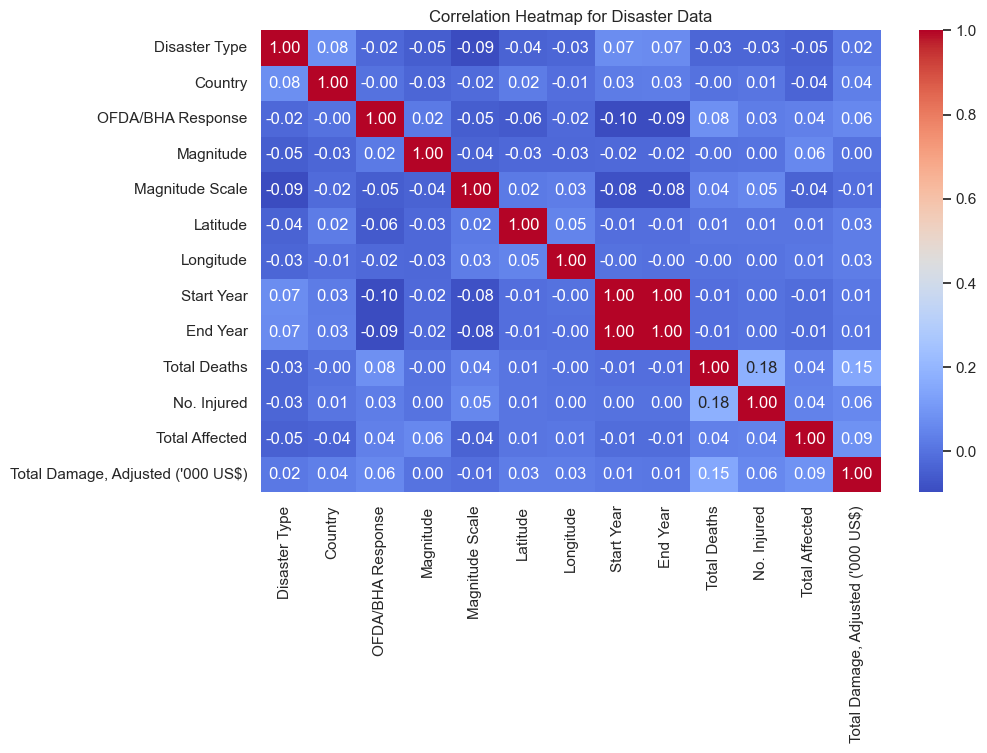

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Disaster Data")
plt.show()

In [ ]:
df.describe()

,Disaster Type,Country,OFDA/BHA Response,Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,End Year,Total Deaths,No. Injured,Total Affected,"Total Damage, Adjusted ('000 US$)"
count,10305.000000,10305.000000,10305.000000,1.030500e+04,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,10305.000000,1.030500e+04,1.030500e+04,1.030500e+04
mean,6.568074,108.925667,0.063173,1.591483e+04,1.145949,16.414882,42.220253,2011.751383,2011.800194,159.722174,7.621856e+02,4.626386e+05,5.377620e+05
std,3.521817,65.814267,0.243286,1.603470e+05,1.474304,9.153207,31.777028,7.457209,7.457017,3429.768371,1.988495e+04,5.682537e+06,4.595277e+06
min,0.000000,0.000000,0.000000,-5.700000e+01,0.000000,-72.640000,-172.095000,2000.000000,2000.000000,1.000000,1.000000e+00,1.000000e+00,3.000000e+00
25%,5.000000,47.000000,0.000000,2.000000e+02,0.000000,16.414882,42.220253,2005.000000,2005.000000,7.000000,3.500000e+01,1.038000e+03,1.414090e+05
50%,5.000000,97.000000,0.000000,2.000000e+02,1.000000,16.414882,42.220253,2011.000000,2011.000000,12.000000,3.500000e+01,5.198000e+03,1.414090e+05
75%,11.000000,158.000000,0.000000,2.000000e+02,2.000000,16.414882,42.220253,2019.000000,2019.000000,22.000000,3.500000e+01,2.700000e+04,1.414090e+05
max,13.000000,219.000000,1.000000,1.302587e+07,5.000000,67.930000,179.650000,2025.000000,2025.000000,222570.000000,1.800000e+06,3.300000e+08,2.844652e+08


In [ ]:
# print(f"Original shape: {df.shape}")
def remove_outliers_iqr(df, multiplier=1.8):
    numeric_columns = df.select_dtypes(include=['number']).columns
    
    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Apply with a higher IQR threshold
df_cleaned = remove_outliers_iqr(df, multiplier=2.0)
print(f"Original shape: {df.shape}")
print(f"New cleaned shape: {df_cleaned.shape}")


Original shape: (10305, 13)
New cleaned shape: (2871, 13)


In [ ]:
# Feature Scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 2:]), columns=df.columns[2:])

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df_scaled, df['Disaster Type'], test_size=0.2, random_state=42)

In [ ]:
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score

# Train XGBoost Model
model = xgb.XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1)
model.fit(X_train, y_train)

In [ ]:
# Predictions
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)

# Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)


# Print classification report
print(classification_report(y_test, y_pred))

Model Accuracy: 0.9349830179524503
              precision    recall  f1-score   support

           1       0.75      0.62      0.68        89
           2       1.00      1.00      1.00       119
           3       0.95      0.97      0.96       172
           4       1.00      1.00      1.00        88
           5       0.91      0.97      0.94       845
           8       1.00      0.83      0.91         6
           9       0.00      0.00      0.00         3
          10       0.85      0.87      0.86        79
          11       1.00      1.00      1.00       569
          12       0.88      0.85      0.86        26
          13       0.55      0.25      0.34        65

    accuracy                           0.93      2061
   macro avg       0.81      0.76      0.78      2061
weighted avg       0.93      0.93      0.93      2061



C:\Users\dasar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dasar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dasar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classificati

In [ ]:
print(df.isnull().sum())

Disaster Type                        0
Country                              0
OFDA/BHA Response                    0
Magnitude                            0
Magnitude Scale                      0
Latitude                             0
Longitude                            0
Start Year                           0
End Year                             0
Total Deaths                         0
No. Injured                          0
Total Affected                       0
Total Damage, Adjusted ('000 US$)    0
dtype: int64


In [ ]:
df.columns

Index(['Disaster Type', 'Country', 'OFDA/BHA Response', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'Start Year', 'End Year',
       'Total Deaths', 'No. Injured', 'Total Affected',
       'Total Damage, Adjusted ('000 US$)'],
      dtype='object')

In [ ]:
df.head()

,Disaster Type,Country,OFDA/BHA Response,Magnitude,Magnitude Scale,Latitude,Longitude,Start Year,End Year,Total Deaths,No. Injured,Total Affected,"Total Damage, Adjusted ('000 US$)"
0,1,54,1,200.0,0,16.414882,42.220253,2001,2001,12.0,35.0,100000.0,141409.0
1,1,186,0,200.0,0,16.414882,42.220253,2000,2001,12.0,35.0,2000000.0,141409.0
2,1,180,0,200.0,0,16.414882,42.220253,2000,2001,21.0,35.0,1200000.0,141409.0
3,5,4,0,47000.0,0,16.414882,42.220253,2000,2000,31.0,35.0,70000.0,17695.0
4,4,13,0,6.4,5,16.414882,42.220253,2000,2000,49.0,35.0,5198.0,141409.0


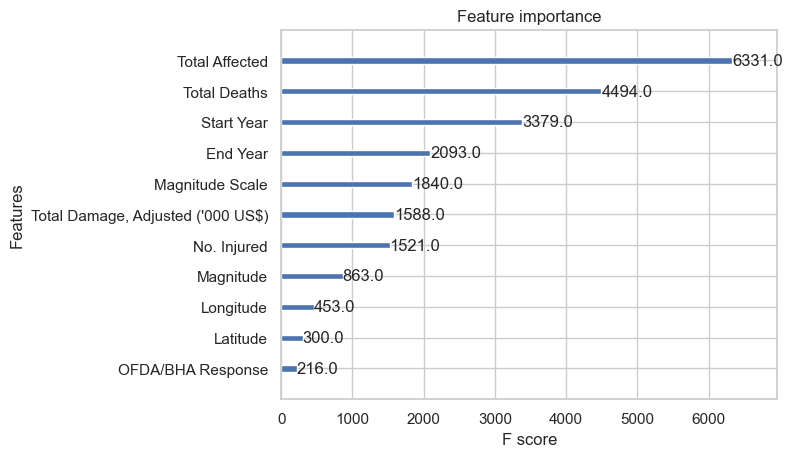

In [ ]:

import matplotlib.pyplot as plt
import xgboost as xgb

# Get feature importance
xgb.plot_importance(model)
plt.show()


In [ ]:
import joblib

# Save model
joblib.dump(model, "xgboost_disaster.pkl")


['xgboost_disaster.pkl']